In [1]:
with open('All_MP_Scripts.txt', 'r') as f:
    text=f.read()

In [4]:
print(f"{len(text)} characters")

1539026 characters


In [5]:
print(text[:1000])

<Direction: A seashore. Some way out to sea a ragged man is struggling his way to shore. Slowly and with difficulty he makes his way up onto the beach, flops down exhausted and announces:> 

It's Man(Michael Palin): It's... 

Voice Over(John Cleese): Monty Python's Flying Circus. 

<Direction: Titles beginning with words "Monty Python's Flying Circus". Various bizarre things happen. When titles end: Ordinary grey-suited announcer standing by desk. He smiles confidently.> 

Announcer(Graham Chapman): Good evening. 

<Direction: The announcer confidently moves to chair and sits down. There is a squeal as of a pig being sat upon. Cut to a blackboard with several lines of pigs drawn on it in colour. A man steps into view and with a piece of chalk crosses out one of the pigs CAPTION: 'IT'S WOLFGANG AMADEUS MOZART' Mozart sitting at piano tinkling with the keys. He finishes tinkling.> 

Mozart(John Cleese): Hello again, and welcome to the show. Tonight we continue to look at some famous deat

In [6]:
chars=sorted(list(set(text)))
vocab_size=len(chars)
print(f"Vocab size: {vocab_size}")

print(''.join(chars))

Vocab size: 103

 !"$%&'()*+,-./0123456789:;<=>?ABCDEFGHIJKLMNOPQRSTUVWXYZ`abcdefghijklmnopqrstuvwxyz£½ÇÉÜàâçèéêëîñôöùü


In [7]:
#Lets make it simple for the gpt

import unicodedata

text = unicodedata.normalize("NFD", text)
text = "".join(c for c in text if unicodedata.category(c) != "Mn")

text = text.replace("`", "'")
text = text.replace("“", "'")
test = text.replace("”", "'")  
text = text.replace('"', "'") 

text = text.replace("=","")
text = text.replace("½","")


# Reemplazo manual de caracteres especiales restantes
text = text.replace("Ç", "C").replace("É", "E").replace("Ü", "U")
text = text.replace("â", "a").replace("è", "e").replace("ê", "e").replace("ë", "e")
text = text.replace("ö", "o").replace("ù", "u")

chars = sorted(list(set(text)))  # Extraer caracteres únicos después de normalizar
vocab_size = len(chars)

print(f"Vocab size: {vocab_size}")
print(''.join(chars))  # Mostrar los caracteres únicos restantes


Vocab size: 83

 !$%&'()*+,-./0123456789:;<>?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz£


In [8]:
#save the corrected version of the text
with open('All_MP_Scripts_cleaned.txt', 'w') as f:
    f.write(text)

In [16]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("Pijus Magnificus"))
print(decode(encode("Pijus Magnificus")))

[45, 64, 65, 76, 74, 1, 42, 56, 62, 69, 64, 61, 64, 58, 76, 74]
Pijus Magnificus


In [17]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1539022]) torch.int64
tensor([27, 33, 64, 73, 60, 58, 75, 64, 70, 69, 25,  1, 30,  1, 74, 60, 56, 74,
        63, 70, 73, 60, 13,  1, 48, 70, 68, 60,  1, 78, 56, 80,  1, 70, 76, 75,
         1, 75, 70,  1, 74, 60, 56,  1, 56,  1, 73, 56, 62, 62, 60, 59,  1, 68,
        56, 69,  1, 64, 74,  1, 74, 75, 73, 76, 62, 62, 67, 64, 69, 62,  1, 63,
        64, 74,  1, 78, 56, 80,  1, 75, 70,  1, 74, 63, 70, 73, 60, 13,  1, 48,
        67, 70, 78, 67, 80,  1, 56, 69, 59,  1, 78, 64, 75, 63,  1, 59, 64, 61,
        61, 64, 58, 76, 67, 75, 80,  1, 63, 60,  1, 68, 56, 66, 60, 74,  1, 63,
        64, 74,  1, 78, 56, 80,  1, 76, 71,  1, 70, 69, 75, 70,  1, 75, 63, 60,
         1, 57, 60, 56, 58, 63, 11,  1, 61, 67, 70, 71, 74,  1, 59, 70, 78, 69,
         1, 60, 79, 63, 56, 76, 74, 75, 60, 59,  1, 56, 69, 59,  1, 56, 69, 69,
        70, 76, 69, 58, 60, 74, 25, 28,  1,  0,  0, 38, 75,  6, 74,  1, 42, 56,
        69,  7, 42, 64, 58, 63, 56, 60, 67,  1, 45, 56, 67, 64, 69,  8, 25,  1,
      

In [19]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [24]:
block_size = 8#context window


x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"input: {context.data} --> target: {target}")

input: tensor([27]) --> target: 33
input: tensor([27, 33]) --> target: 64
input: tensor([27, 33, 64]) --> target: 73
input: tensor([27, 33, 64, 73]) --> target: 60
input: tensor([27, 33, 64, 73, 60]) --> target: 58
input: tensor([27, 33, 64, 73, 60, 58]) --> target: 75
input: tensor([27, 33, 64, 73, 60, 58, 75]) --> target: 64
input: tensor([27, 33, 64, 73, 60, 58, 75, 64]) --> target: 70


In [32]:
torch.manual_seed(1337)

batch_size = 4 # how many independent sequences will we process in parallel?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data

    ix = torch.randint(len(data) - block_size, (batch_size,)) #4 numbers generated between 0 and lendata-blocksize
    
    x = torch.stack([data[i:i+block_size] for i in ix])#stack as rows# inputs
    y = torch.stack([data[i+1:i+block_size+1] for i in ix]) #stack as rows# groundtruth
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    print(f"Batch #{b}")
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is [ {decode(context.tolist())} ] the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[49,  1, 35, 47, 30, 50,  1, 42],
        [60, 58, 75, 64, 70, 69, 25,  1],
        [ 1, 35, 47, 44, 42,  1, 46, 50],
        [73, 74, 75,  1, 75, 64, 68, 60]])
targets:
torch.Size([4, 8])
tensor([[ 1, 35, 47, 30, 50,  1, 42, 38],
        [58, 75, 64, 70, 69, 25,  1, 30],
        [35, 47, 44, 42,  1, 46, 50, 38],
        [74, 75,  1, 75, 64, 68, 60,  1]])
----
Batch #0
when input is [ T ] the target: 1
when input is [ T  ] the target: 35
when input is [ T F ] the target: 47
when input is [ T FR ] the target: 30
when input is [ T FRA ] the target: 50
when input is [ T FRAU ] the target: 1
when input is [ T FRAU  ] the target: 42
when input is [ T FRAU M ] the target: 38
Batch #1
when input is [ e ] the target: 58
when input is [ ec ] the target: 75
when input is [ ect ] the target: 64
when input is [ ecti ] the target: 70
when input is [ ectio ] the target: 69
when input is [ ection ] the target: 25
when input is [ ection: ] the target: 1
when input is

Lets start with a simple bigramLM, but this time using pytorch

Prediction is made only based on the individual identity of the current token

In [40]:
import math

import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size) #vocabsize x vocabsize

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C) #Batch-Time-Channel #batch-context-vocabsize

        if targets is None:#Running time
            
            loss = None
        
        else:#Train/Val time

            #pytorch wants channels as the second dim (b,c,t)
            B, T, C = logits.shape
            logits = logits.view(B*T, C)#2d array
            targets = targets.view(B*T)#targets.view(-1)#1d array
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits,  = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # last elements in time dim. becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
expected_loss=math.log(1/vocab_size)*-1
print(f"expected loss:{expected_loss}")
print(f"loss:{loss}")



torch.Size([32, 83])
expected loss:4.418840607796598
loss:4.839823246002197


In [55]:
#A total mess :)
first_char= torch.zeros((1, 1), dtype=torch.long)
print(decode(m.generate(first_char, max_new_tokens=100)[0].tolist()))



gJH9bp<OI>rm ynvo-SE<27zHqXfJuzht'TY0-fH4f6HfvL..n>5GTkjArEn&7ige8B5KIY(Fmv9v/£Vt*iUqSWNxacc LJS1LU>


In [57]:
# create a PyTorch optimizer
#https://www.youtube.com/watch?v=MD2fYip6QsQ
#until now we only use stochastic gradient descent
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)#1e-4 for bigger networks

#### AdamW Optimizer: A Practical Guide

**What is AdamW?**

AdamW is an improved version of the popular Adam optimizer, with better handling of weight decay for neural network training. Introduced in the 2017 paper ["Decoupling Weight Decay Regularization from Gradient Descent"](https://arxiv.org/abs/1711.05101) by Loshchilov and Hutter.

**Key Benefits**

- **⚙️Adaptive learning rates** - Automatically adjusts learning rates for each parameter
- **🏃Momentum-based** - Keeps track of past gradients to smooth optimization
- **⚖️Proper weight decay** - Correctly implements L2 regularization (unlike Adam)
- **🚄 Fast convergence** - Often converges faster than SGD with momentum
- **🛡️Less sensitive to hyperparameters** - Works well with default settings

**How AdamW Differs from Adam**

The key difference is in how weight decay(a regularization technique that prevents overfitting by penalizing large weight values) is applied:

- **Adam**: Applies weight decay to the gradients, which interacts poorly with the adaptive learning rates
- **AdamW**: Decouples weight decay from gradient updates, applying it directly to the weights


**Basic PyTorch Implementation**

```python
# Simple implementation in PyTorch
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)
```

| Parameter | Typical Values | Description |
|-----------|----------------|-------------|
| `lr` | 1e-3 to 1e-5 | Learning rate (smaller for larger models) |
| `betas` | (0.9, 0.999) | Exponential decay rates for moment estimates |
| `eps` | 1e-8 | Term added for numerical stability |
| `weight_decay` | 0.01 to 0.1 | Regularization parameter (higher = stronger regularization) |

**Learning Rates advice**

- Smaller networks: 1e-3 to 1e-4
- Medium networks: 1e-4 to 1e-5
- Large networks: 1e-5 to 1e-6

**Visual Intuition**

AdamW combines the benefits of:
- **RMSProp**: Divides gradients by running average of squared gradients
- **Momentum**: Accelerates in directions of persistent gradient
- **Weight Decay**: Keeps weights small through direct regularization


**⚠️Common Pitfalls**

- Using too high learning rate initially
- Not using enough weight decay for large models



In [60]:
batch_size = 32
n_steps = 200000

loss_history = []  # Lista para almacenar la pérdida

for steps in range(n_steps):  # Aumenta el número de pasos para mejores resultados...

    # Muestra un lote de datos
    xb, yb = get_batch('train')

    # Evalúa la pérdida
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    if (steps + 1) % 20000 == 0:
        print(f"Step {steps + 1}/{n_steps}, Loss: {loss.item()}")
    # Almacena la pérdida en la lista
    loss_history.append(loss.item())

print("Final Loss:", loss.item())

Step 20000/200000, Loss: 2.473804473876953
Step 40000/200000, Loss: 2.579519033432007
Step 60000/200000, Loss: 2.5212044715881348
Step 80000/200000, Loss: 2.4461610317230225
Step 100000/200000, Loss: 2.3894824981689453
Step 120000/200000, Loss: 2.4594857692718506
Step 140000/200000, Loss: 2.583327054977417
Step 160000/200000, Loss: 2.5809638500213623
Step 180000/200000, Loss: 2.490457773208618
Step 200000/200000, Loss: 2.542508125305176
Final Loss: 2.542508125305176


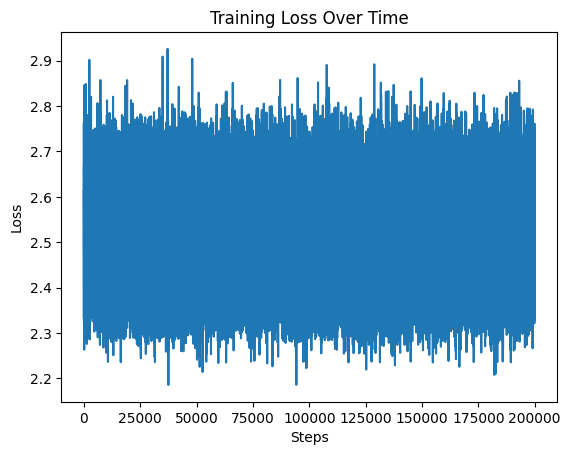

In [61]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

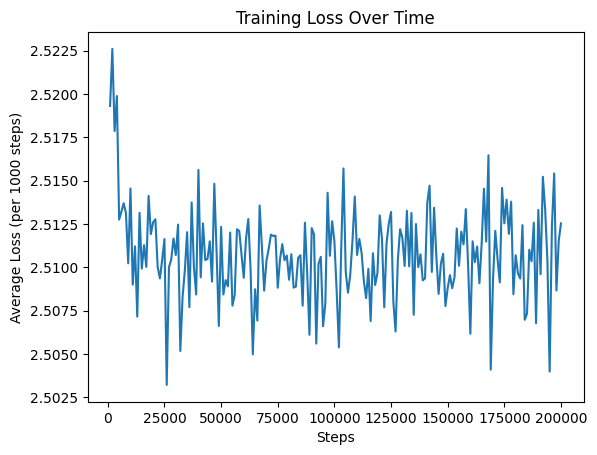

In [64]:
import numpy as np

log_interval = 1000  # Interval for averaging
n_steps = len(loss_history)  # Total steps from the recorded data

# Compute the moving average every 1000 steps
loss_avg_history = [
    np.mean(loss_history[i : i + log_interval]) 
    for i in range(0, n_steps, log_interval)
]

# Plot the averaged loss
plt.plot(range(log_interval, n_steps + 1, log_interval), loss_avg_history)
plt.xlabel('Steps')
plt.ylabel('Average Loss (per 1000 steps)')
plt.title('Training Loss Over Time')
plt.show()

In [67]:
#Slighty better
first_char= torch.zeros((1, 1), dtype=torch.long)
print(decode(m.generate(first_char, max_new_tokens=200)[0].tolist()))


Swely, 


Tr bon aed Dican, Liow, saurecoffondinchon reritisn he io urens SE' s. Ch s 



Maechals brst I', merge't Mis huneen'. ay, asyowitrrck(Gale! HOmaerechusiato gsthit We): Y Iddanthn ban(Eretof


____

The code generated until now has been moved to the folder bigram

___

Math trick in self-attention

In [33]:
import torch
from torch.nn import functional as F
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time-context window, channels-vocab size
x = torch.randn(B,T,C)
x.shape

#info only flows from past ot the present. never from future to the present

torch.Size([4, 8, 2])

In [29]:
# We want x[b,t] = mean_{i<=t} x[b,i]
# this is a very silly way of attention. Each character has info from the previous ones

#Unefficient way. python for loops: 🤢
xbow = torch.zeros((B,T,C)) #bag of words
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C) # on this batch, every char form 0 to t
        xbow[b,t] = torch.mean(xprev, 0)


In [30]:
# now the matrix trick 🪄

## VERSION 1

torch.manual_seed(42)  # Set random seed for reproducibility

# Step 1: Create a lower triangular matrix (with values 1.0 below and on diagonal, 0.0 above)
a = torch.tril(torch.ones(3, 3))
print('Step 1 - Lower triangular matrix:')
print(a)
print('--')

# Step 2: Normalize each row to sum to 1 (convert to row-wise probability distributions)
a = a / torch.sum(a, 1, keepdim=True)
print('Step 2 - Row-normalized matrix (weights):')
print(a)
print('--')
# This creates:
# [[1.0000, 0.0000, 0.0000],  # First row: 100% weight on first element
#  [0.5000, 0.5000, 0.0000],  # Second row: 50% weight on first, 50% on second
#  [0.3333, 0.3333, 0.3333]]  # Third row: Equal weights (33.3%) on all elements

# Step 3: Create a random matrix with values to aggregate
b = torch.randint(0, 10, (3, 2)).float()
print('Step 3 - Values to aggregate:')
print(b)
print('--')
# This creates a 3x2 matrix with random values between 0-9

# Step 4: Perform matrix multiplication (a @ b)
c = a @ b
print('Step 4 - Result of weighted aggregation:')
print(c)
print('--')

# Let's break down what this matrix multiplication is actually doing:
print('Understanding the calculation:')
print(f"Row 1 of c: {b[0]} (only using the first value)")
print(f"Row 2 of c: {b[0]} * 0.5 + {b[1]} * 0.5 = {b[0] * 0.5 + b[1] * 0.5}")
print(f"Row 3 of c: {b[0]} * 0.33 + {b[1]} * 0.33 + {b[2]} * 0.33 = {b[0] * 0.33 + b[1] * 0.33 + b[2] * 0.33}")
print('--')

Step 1 - Lower triangular matrix:
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
--
Step 2 - Row-normalized matrix (weights):
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
Step 3 - Values to aggregate:
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
Step 4 - Result of weighted aggregation:
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])
--
Understanding the calculation:
Row 1 of c: tensor([2., 7.]) (only using the first value)
Row 2 of c: tensor([2., 7.]) * 0.5 + tensor([6., 4.]) * 0.5 = tensor([4.0000, 5.5000])
Row 3 of c: tensor([2., 7.]) * 0.33 + tensor([6., 4.]) * 0.33 + tensor([6., 5.]) * 0.33 = tensor([4.6200, 5.2800])
--


In [31]:
# VERSION 2
# using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T) @ (B, T, C) ----> (B, T, T) @ (B, T, C) ---->(B, T, C)

torch.allclose(xbow, xbow2,1e-5,1e-3)#looks if equal

True

In [26]:
torch.min(xbow-xbow2), torch.max(xbow-xbow2) 

(tensor(-2.9802e-08), tensor(3.2363e-08))

In [37]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf')) #replace positions where tril==0 with negative infinity
print(wei)
wei = F.softmax(wei, dim=-1)# Now each row sums to 1.0 and represents a probability distribution
# Due to the -inf values, softmax will assign zero probability to future positions
# This implements the "causal" attention pattern where each token only looks at previous tokens
print(wei)

xbow3 = wei @ x
torch.allclose(xbow, xbow3,1e-5,1e-3)


'''
Zero probability to all future positions (they had -inf values)
Non-zero probabilities only to current and past positions
Each row sums to 1.0 (proper probability distribution)
'''


tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])


True